# Results

All results presented in the MRes Thesis (see pdf) can be recreated by this notebook


In [1]:
import matplotlib as mpl
import pandas as pd
from evaluation.evaluate import load_metrics, plot_AUC_curves
from metrics import load_eyePACs_dataset, load_messidor_dataset

In [2]:
## Methodology Ablation Study

In [3]:
model_directory = "models"
metrics_ablations = {}
model_names = set()
for root, dirs, files in os.walk(model_directory, topdown=False):
        for name in files:
            if name == "model_params.pt" and "ablations" in root:
                print(root)
                root_up_one, model_name = os.path.split(root)
                model_names.add(model_name)
                ablation = os.path.split(root_up_one)[-1]
                ablation_pre_rec_auc = load_metrics(root, "EyePACs_Dataset", phase="test")["Pre/Rec AUC"].item()
                if ablation in metrics_ablations:
                    metrics_ablations[ablation].append(ablation_pre_rec_auc)
                else:
                    metrics_ablations[ablation] = [ablation_pre_rec_auc]    

models\ablations\Baseline\ResNet50-21k-384
models\ablations\Baseline\ViT-S-21k-384
models\ablations\No_Data_Aug\ResNet50-21k-384
models\ablations\No_Data_Aug\ViT-S-21k-384
models\ablations\No_Gradient_Accumulation\ResNet50-21k-384
models\ablations\No_Gradient_Accumulation\ViT-S-21k-384
models\ablations\Ungradables_included\ResNet50-21k-384
models\ablations\Ungradables_included\ViT-S-21k-384


In [4]:
results_df = pd.DataFrame.from_dict(metrics_ablations, orient='index', dtype=float, columns=model_names)
results_df.round(3)

,ResNet50-21k-384,ViT-S-21k-384
Baseline,0.864,0.820
No_Data_Aug,0.804,0.754
No_Gradient_Accumulation,0.805,0.771
Ungradables_included,0.889,0.845


## Classification Performance

In [5]:
import pandas as pd

from evaluation.evaluate import load_metrics, plot_AUC_curves
from metrics import load_eyePACs_dataset, load_messidor_dataset

model_directory = "models"

metrics_eyePACs = {}
metrics_messidor = {}
for root, dirs, files in os.walk(model_directory, topdown=False):
        for name in files:
            if name == "model_params.pt" and "ablations" not in root:
                print(root)
                model_name = os.path.split(root)[-1]
                metrics_eyePACs[model_name] = load_metrics(root, "EyePACs_Dataset", phase="test")
                metrics_messidor[model_name] = load_metrics(root, "Messidor_Dataset", phase="test")

models\384\21k\ResNet50-21k-384
models\384\21k\ViT-S-21k-384
models\384\DINO\ResNet50-DINO-384
models\384\DINO\ViT-S-DINO-384
models\data_eff\ResNet50-21k-224\0.25
models\data_eff\ResNet50-21k-224\0.5
models\data_eff\ResNet50-21k-224\0.75
models\data_eff\ResNet50-21k-224\1.0
models\data_eff\ResNet50-DINO-224\0.25
models\data_eff\ResNet50-DINO-224\0.5
models\data_eff\ResNet50-DINO-224\0.75
models\data_eff\ResNet50-DINO-224\1.0
models\data_eff\ViT-S-21k-224\0.25
models\data_eff\ViT-S-21k-224\0.5
models\data_eff\ViT-S-21k-224\0.75
models\data_eff\ViT-S-21k-224\1.0
models\data_eff\ViT-S-DINO-224\0.25
models\data_eff\ViT-S-DINO-224\0.5
models\data_eff\ViT-S-DINO-224\0.75
models\data_eff\ViT-S-DINO-224\1.0
models\_224\21k\ResNet50-21k-224
models\_224\21k\ViT-S-21k-224
models\_224\DINO\ResNet50-DINO-224
models\_224\DINO\ViT-S-DINO-224


In [6]:
def get_table_of_results_from_metrics(metrics, columns_of_interest):
    results_df = pd.DataFrame.from_dict(metrics, orient='index', dtype=float)
    results_df = results_df[columns_of_interest]
    return results_df.round(3)

columns_of_interest = ["precision_score", "recall_score", "f1", "Pre/Rec AUC"]
get_table_of_results_from_metrics(metrics_eyePACs, columns_of_interest)

,precision_score,recall_score,f1,Pre/Rec AUC
ResNet50-21k-384,0.786,0.778,0.782,0.864
ViT-S-21k-384,0.744,0.724,0.734,0.820
ResNet50-DINO-384,0.740,0.661,0.698,0.787
ViT-S-DINO-384,0.763,0.690,0.724,0.811
0.25,0.570,0.567,0.569,0.645
0.5,0.639,0.640,0.640,0.732
0.75,0.681,0.659,0.670,0.757
1.0,0.678,0.669,0.673,0.767
ResNet50-21k-224,0.775,0.671,0.720,0.807
ViT-S-21k-224,0.742,0.616,0.673,0.760


In [7]:
get_table_of_results_from_metrics(metrics_messidor, columns_of_interest)

,precision_score,recall_score,f1,Pre/Rec AUC
ResNet50-21k-384,0.882,0.897,0.889,0.954
ViT-S-21k-384,0.895,0.763,0.824,0.915
ResNet50-DINO-384,0.895,0.549,0.680,0.846
ViT-S-DINO-384,0.871,0.768,0.816,0.914
0.25,0.719,0.656,0.686,0.811
0.5,0.841,0.638,0.726,0.848
0.75,0.837,0.688,0.755,0.881
1.0,0.834,0.694,0.758,0.876
ResNet50-21k-224,0.898,0.763,0.825,0.913
ViT-S-21k-224,0.852,0.656,0.741,0.859


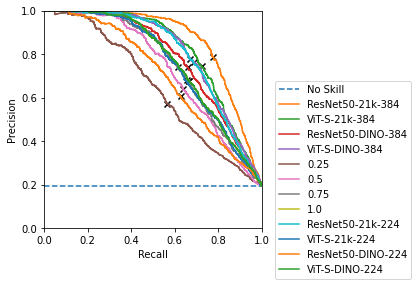

In [8]:
eyePACs_data_directory = os.path.join("data", "eyePACs")
eyePACS_datasets = load_eyePACs_dataset(eyePACs_data_directory, random_state=13)
labels_eyePACs = eyePACS_datasets["test"].get_labels()
plot_AUC_curves(labels_eyePACs, metrics_eyePACs)

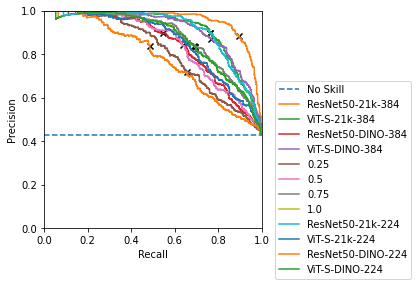

In [9]:
messidor_data_directory = os.path.join("data", "messidor")
messidor_datasets = load_messidor_dataset(messidor_data_directory)
labels_messidor = messidor_datasets["test"].get_labels()
plot_AUC_curves(labels_messidor, metrics_messidor)

## Effiency
### Compute

In [10]:
from evaluation.timing import calc_image_throughput
from utilities import models
import torch

model_names = ["ViT-S", "ResNet50"]
img_sizes = [384, 224]
image_throughputs = {}
pretraining = "21k"
num_classes = 2

for img_size in img_sizes:
    for model_name in model_names:
        model_name_full = "-".join([model_name, pretraining, str(img_size)])
        print(model_name_full)
        model, _ = models.load_model(model_name, pretraining, num_classes, img_size)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model.to(device)
        batch_size = 64 if img_size == 224 else 16
        image_throughputs[model_name_full], _ = calc_image_throughput(model, device, img_size, batch_size)


ViT-S-21k-384


c:\Users\rmhisje\Documents\medical_ViT\venv\lib\site-packages\torch\nn\functional.py:3454: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


ResNet50-21k-384
ViT-S-21k-224
ResNet50-21k-224


In [11]:
pd.DataFrame.from_dict(image_throughputs, orient='index', dtype=float, columns=["Image Throughput"]).round(1)

,Image Throughput
ViT-S-21k-384,127.4
ResNet50-21k-384,186.7
ViT-S-21k-224,449.1
ResNet50-21k-224,560.7


### Data Efficency

In [12]:
import matplotlib.pyplot as plt
metrics_data_eff = {}
fractions = set()
for root, dirs, files in os.walk(model_directory, topdown=False):
        for name in files:
            if name == "model_params.pt" and "data_eff" in root:
                print(root)
                root_up_one, fraction = os.path.split(root)
                model_name = os.path.split(root_up_one)[-1]
                fractions.add(float(fraction))
                data_eff_pre_rec_auc = load_metrics(root, "EyePACs_Dataset", phase="test")["Pre/Rec AUC"].item()
                if model_name in metrics_data_eff:
                    metrics_data_eff[model_name].append(data_eff_pre_rec_auc)
                else:
                    metrics_data_eff[model_name] = [data_eff_pre_rec_auc]  

models\data_eff\ResNet50-21k-224\0.25
models\data_eff\ResNet50-21k-224\0.5
models\data_eff\ResNet50-21k-224\0.75
models\data_eff\ResNet50-21k-224\1.0
models\data_eff\ResNet50-DINO-224\0.25
models\data_eff\ResNet50-DINO-224\0.5
models\data_eff\ResNet50-DINO-224\0.75
models\data_eff\ResNet50-DINO-224\1.0
models\data_eff\ViT-S-21k-224\0.25
models\data_eff\ViT-S-21k-224\0.5
models\data_eff\ViT-S-21k-224\0.75
models\data_eff\ViT-S-21k-224\1.0
models\data_eff\ViT-S-DINO-224\0.25
models\data_eff\ViT-S-DINO-224\0.5
models\data_eff\ViT-S-DINO-224\0.75
models\data_eff\ViT-S-DINO-224\1.0


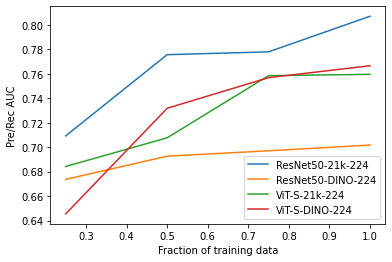

In [13]:
fractions = list(fractions)
fractions.sort()
for model_name, pre_rec_auc in metrics_data_eff.items():
    plt.plot(fractions, pre_rec_auc, label=model_name)
plt.xlabel("Fraction of training data")
plt.ylabel("Pre/Rec AUC")
plt.legend()
plt.show()

## Explainability

Load IDRiD dataset

In [14]:
import explainability.evaluate
from explainability.vit_rollout import VITAttentionRollout
import explainability.interpreters
from pytorch_grad_cam import GradCAM
from datasets.IDRiD import IDRiD_Dataset
import numpy as np
img_size = 384
dataset_IDRiD = IDRiD_Dataset(os.path.join("data", "idrid"), img_size=384, patch_size=16)

Load models

In [15]:
model_384_dir = os.path.join(model_directory, "384")
patch_size = 16
# Intersect bar chart
hit_rates = []
sensitivities = []
methods = []
# Side by side vis
num_samples = 5
num_methods = 6
method_num = 0
heatmap_size = img_size//patch_size
sample_heatmaps = np.zeros((num_methods, num_samples, heatmap_size, heatmap_size))
# fig, axes = plt.subplots(num_samples, 8, squeeze=False)
# col_num = 2
# AUC:
y_true = explainability.evaluate.get_ground_truth_1D_array(dataset_IDRiD, heatmap_size)
pre_rec_dict = {}
# fig, ax = plt.subplots()
# AUC = {}


In [16]:
def calc_hit_rate_and_sensitivity(dataset, heatmaps, interpreter_label, hit_rates, sensitivities):
    hit_rates.append(explainability.evaluate.get_hit_rate(dataset, heatmaps))
    sensitivities.append(explainability.evaluate.calc_weighted_sensitivity(dataset, heatmaps))

def add_sample_heatmaps(method_heatmaps, sample_heatmaps, num_samples, method_num):
    sample_heatmaps[method_num,:,:,:] = method_heatmaps[:num_samples,:,:]
    method_num += 1
    return sample_heatmaps, method_num

def explainability_pre_rec_curve(y_true, heatmaps, interpreter_label, pre_rec_dict):
    y_pred = heatmaps.flatten()
    precision, recall, _, _ = explainability.evaluate.calc_pre_rec_curve(y_true, y_pred)
    pre_rec_dict[interpreter_label] = (precision, recall)

In [17]:
model_name = "ViT-S"
pretraining = "DINO"
model_name_full = "-".join([model_name, pretraining, str(img_size)])
model_fpath = os.path.join(model_384_dir, pretraining, model_name_full, "model_params.pt")
model, use_inception_norm = models.load_model(model_name, pretraining, num_classes, img_size, model_fpath)
dataset_IDRiD.set_norm_consts(True)

interpreter = explainability.interpreters.Last_Layer(model[0])
interpreter_label = f"Last Layer\n({model_name}-{pretraining})"

# intersect bar chart
heatmaps = explainability.interpreters.generate_heatmaps(dataset_IDRiD, interpreter, img_size, patch_size)
calc_hit_rate_and_sensitivity(dataset_IDRiD, heatmaps, interpreter_label, hit_rates, sensitivities)
sample_heatmaps, method_num = add_sample_heatmaps(heatmaps, sample_heatmaps, num_samples, method_num)
explainability_pre_rec_curve(y_true, heatmaps, interpreter_label, pre_rec_dict)
methods.append(interpreter_label)

Using cache found in C:\Users\rmhisje/.cache\torch\hub\facebookresearch_dino_main
c:\Users\rmhisje\Documents\medical_ViT\venv\lib\site-packages\torch\nn\functional.py:3454: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
c:\Users\rmhisje\Documents\medical_ViT\venv\lib\site-packages\torch\nn\functional.py:3502: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(


In [18]:
model, use_inception_norm = models.load_model(model_name, pretraining, num_classes, img_size, model_fpath)
interpreter = VITAttentionRollout(model, discard_ratio=0.9, head_fusion="max")
interpreter_label = f"Attention Rollout\n({model_name}-{pretraining})"

heatmaps = explainability.interpreters.generate_heatmaps(dataset_IDRiD, interpreter, img_size, patch_size)
calc_hit_rate_and_sensitivity(dataset_IDRiD, heatmaps, interpreter_label, hit_rates, sensitivities)
sample_heatmaps, method_num = add_sample_heatmaps(heatmaps, sample_heatmaps, num_samples, method_num)
explainability_pre_rec_curve(y_true, heatmaps, interpreter_label, pre_rec_dict)
methods.append(interpreter_label)

Using cache found in C:\Users\rmhisje/.cache\torch\hub\facebookresearch_dino_main
c:\Users\rmhisje\Documents\medical_ViT\venv\lib\site-packages\torch\nn\functional.py:3454: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
c:\Users\rmhisje\Documents\medical_ViT\venv\lib\site-packages\torch\nn\functional.py:3502: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(


In [19]:
model_name = "ViT-S"
pretraining = "21k"
model_name_full = "-".join([model_name, pretraining, str(img_size)])
model_fpath = os.path.join(model_384_dir, pretraining, model_name_full, "model_params.pt")
model, use_inception_norm = models.load_model(model_name, pretraining, num_classes, img_size, model_fpath)
dataset_IDRiD.set_norm_consts(use_inception_norm)

interpreter = explainability.interpreters.Last_Layer(model)
interpreter_label = f"Last Layer\n({model_name}-{pretraining})"

heatmaps = explainability.interpreters.generate_heatmaps(dataset_IDRiD, interpreter, img_size, patch_size)
calc_hit_rate_and_sensitivity(dataset_IDRiD, heatmaps, interpreter_label, hit_rates, sensitivities)
sample_heatmaps, method_num = add_sample_heatmaps(heatmaps, sample_heatmaps, num_samples, method_num)
explainability_pre_rec_curve(y_true, heatmaps, interpreter_label, pre_rec_dict)
methods.append(interpreter_label)

c:\Users\rmhisje\Documents\medical_ViT\venv\lib\site-packages\torch\nn\functional.py:3454: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


In [20]:
model, use_inception_norm = models.load_model(model_name, pretraining, num_classes, img_size, model_fpath)
interpreter = VITAttentionRollout(model, discard_ratio=0.9, head_fusion="max")
interpreter_label = f"Attention Rollout\n({model_name}-{pretraining})"

heatmaps = explainability.interpreters.generate_heatmaps(dataset_IDRiD, interpreter, img_size, patch_size)
calc_hit_rate_and_sensitivity(dataset_IDRiD, heatmaps, interpreter_label, hit_rates, sensitivities)
sample_heatmaps, method_num = add_sample_heatmaps(heatmaps, sample_heatmaps, num_samples, method_num)
explainability_pre_rec_curve(y_true, heatmaps, interpreter_label, pre_rec_dict)
methods.append(interpreter_label)

c:\Users\rmhisje\Documents\medical_ViT\venv\lib\site-packages\torch\nn\functional.py:3454: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


In [21]:
model_name = "ResNet50"
pretraining = "21k"
model_name_full = "-".join([model_name, pretraining, str(img_size)])
model_fpath = os.path.join(model_384_dir, pretraining, model_name_full, "model_params.pt")
model, use_inception_norm = models.load_model(model_name, pretraining, num_classes, img_size, model_fpath)
dataset_IDRiD.set_norm_consts(use_inception_norm)

interpreter = GradCAM(model=model, target_layer=model.stages[-1], use_cuda=True)
interpreter_label = f"GradCAM\n({model_name}-{pretraining})"

heatmaps = explainability.interpreters.generate_heatmaps(dataset_IDRiD, interpreter, img_size, patch_size)
calc_hit_rate_and_sensitivity(dataset_IDRiD, heatmaps, interpreter_label, hit_rates, sensitivities)
sample_heatmaps, method_num = add_sample_heatmaps(heatmaps, sample_heatmaps, num_samples, method_num)
explainability_pre_rec_curve(y_true, heatmaps, interpreter_label, pre_rec_dict)
methods.append(interpreter_label)

c:\Users\rmhisje\Documents\medical_ViT\venv\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


In [22]:
model_name = "ResNet50"
pretraining = "DINO"
model_name_full = "-".join([model_name, pretraining, str(img_size)])
model_fpath = os.path.join(model_384_dir, pretraining, model_name_full, "model_params.pt")
model, use_inception_norm = models.load_model(model_name, pretraining, num_classes, img_size, model_fpath)
dataset_IDRiD.set_norm_consts(use_inception_norm)

interpreter = GradCAM(model=model, target_layer=model[0].layer4[-1], use_cuda=True)
interpreter_label = f"GradCAM\n({model_name}-{pretraining})"

heatmaps = explainability.interpreters.generate_heatmaps(dataset_IDRiD, interpreter, img_size, patch_size)
calc_hit_rate_and_sensitivity(dataset_IDRiD, heatmaps, interpreter_label, hit_rates, sensitivities)
sample_heatmaps, method_num = add_sample_heatmaps(heatmaps, sample_heatmaps, num_samples, method_num)
explainability_pre_rec_curve(y_true, heatmaps, interpreter_label, pre_rec_dict)
methods.append(interpreter_label)

Using cache found in C:\Users\rmhisje/.cache\torch\hub\facebookresearch_dino_main
c:\Users\rmhisje\Documents\medical_ViT\venv\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


In [23]:
interpreter = explainability.interpreters.get_random_map
interpreter_label = "Random"

heatmaps = explainability.interpreters.generate_heatmaps(dataset_IDRiD, interpreter, img_size, patch_size)
calc_hit_rate_and_sensitivity(dataset_IDRiD, heatmaps, interpreter_label, hit_rates, sensitivities)
methods.append(interpreter_label)

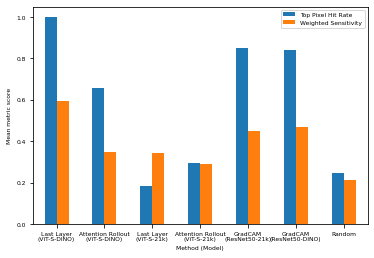

In [24]:
plt.rc('font', size=6) 
df = pd.DataFrame(list(zip(methods, hit_rates, sensitivities)), columns =['Method', 'Top Pixel Hit Rate', "Weighted Sensitivity"])
df.round(2)
df.plot.bar(x="Method", rot=0)
plt.xlabel("Method (Model)")
plt.ylabel("Mean metric score")
plt.show()

OSError: [Errno 22] Invalid argument: 'figures/test.png'

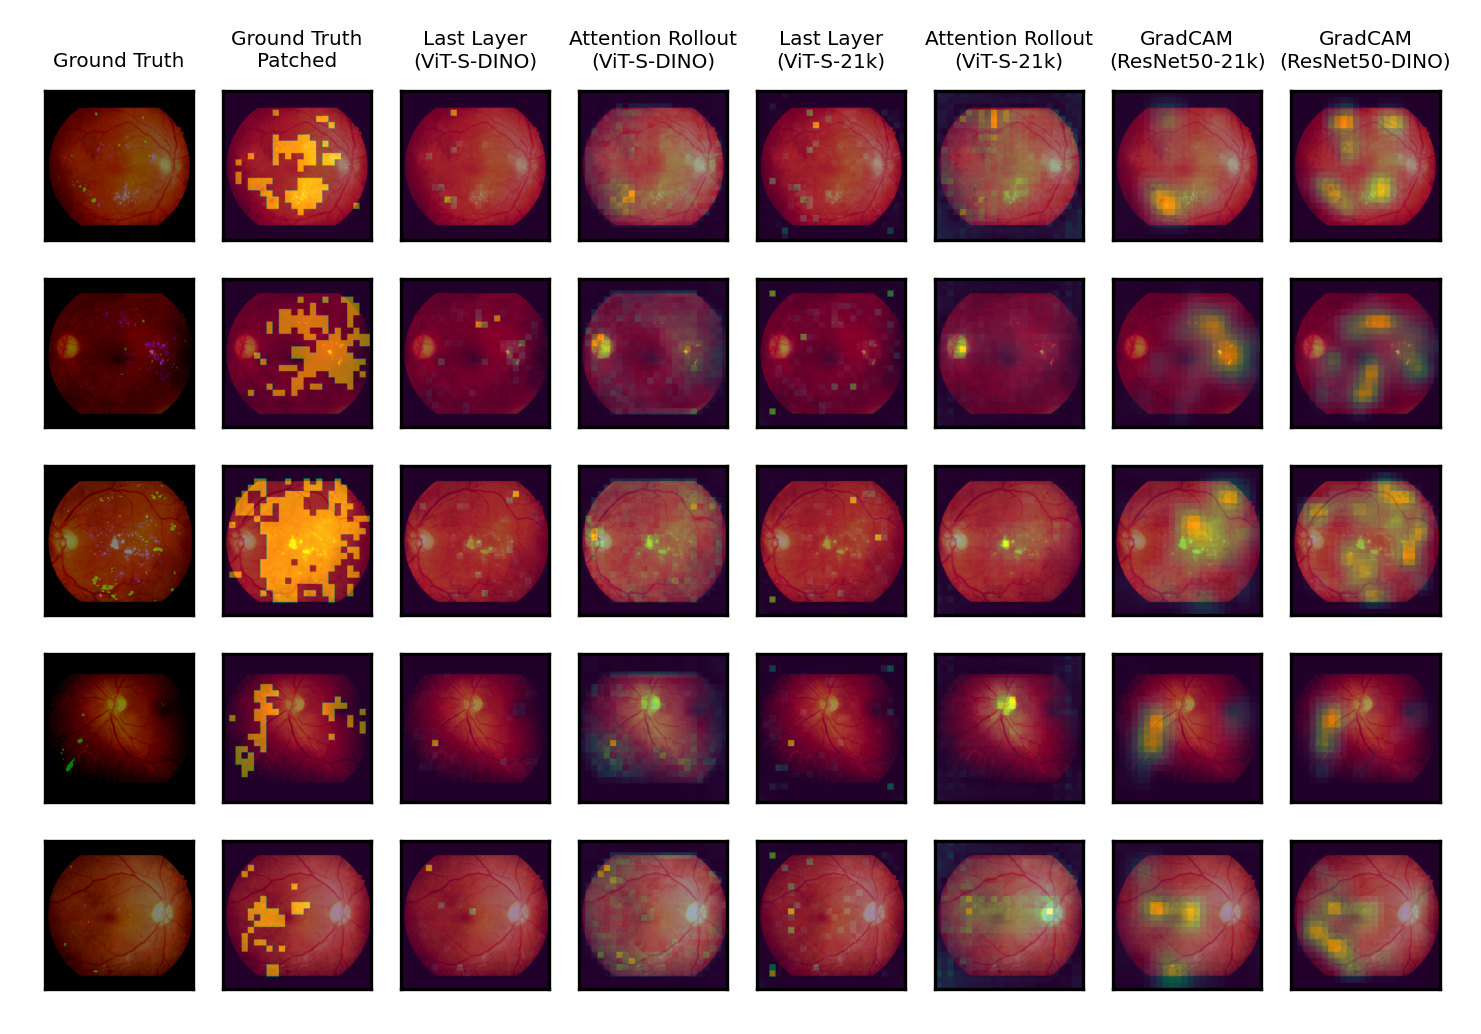

In [25]:
from utilities import visualisation
import cv2
mpl.rcParams['figure.dpi']= 300
plt.rc('font', size=4) 


extra_cols = 2
fig, axes = plt.subplots(num_samples, num_methods+extra_cols)

for sample_num in range(num_samples):
    for method_num in range(num_methods+extra_cols):
        ax = axes[sample_num, method_num]
        image, seg, seg_cum, _, _ = dataset_IDRiD[sample_num]
        visualisation.imshow(image, ax=ax)
        if method_num == 0:
            heatmap = seg
            title = "Ground Truth"
        elif method_num == 1:
            heatmap = seg_cum
            title = "Ground Truth\nPatched"
        else:
            heatmap = sample_heatmaps[method_num-extra_cols, sample_num]
            title = methods[method_num-extra_cols]
        heatmap_upsample = cv2.resize(heatmap, dsize=(image.size(-1), image.size(-1)), interpolation=cv2.INTER_NEAREST)
        ax.imshow(heatmap_upsample, alpha=0.5)
        ax.set_xticks([])
        ax.set_yticks([])
        if sample_num == 0:
            ax.title.set_text(title)
plt.savefig("figures/test.png")
plt.show()

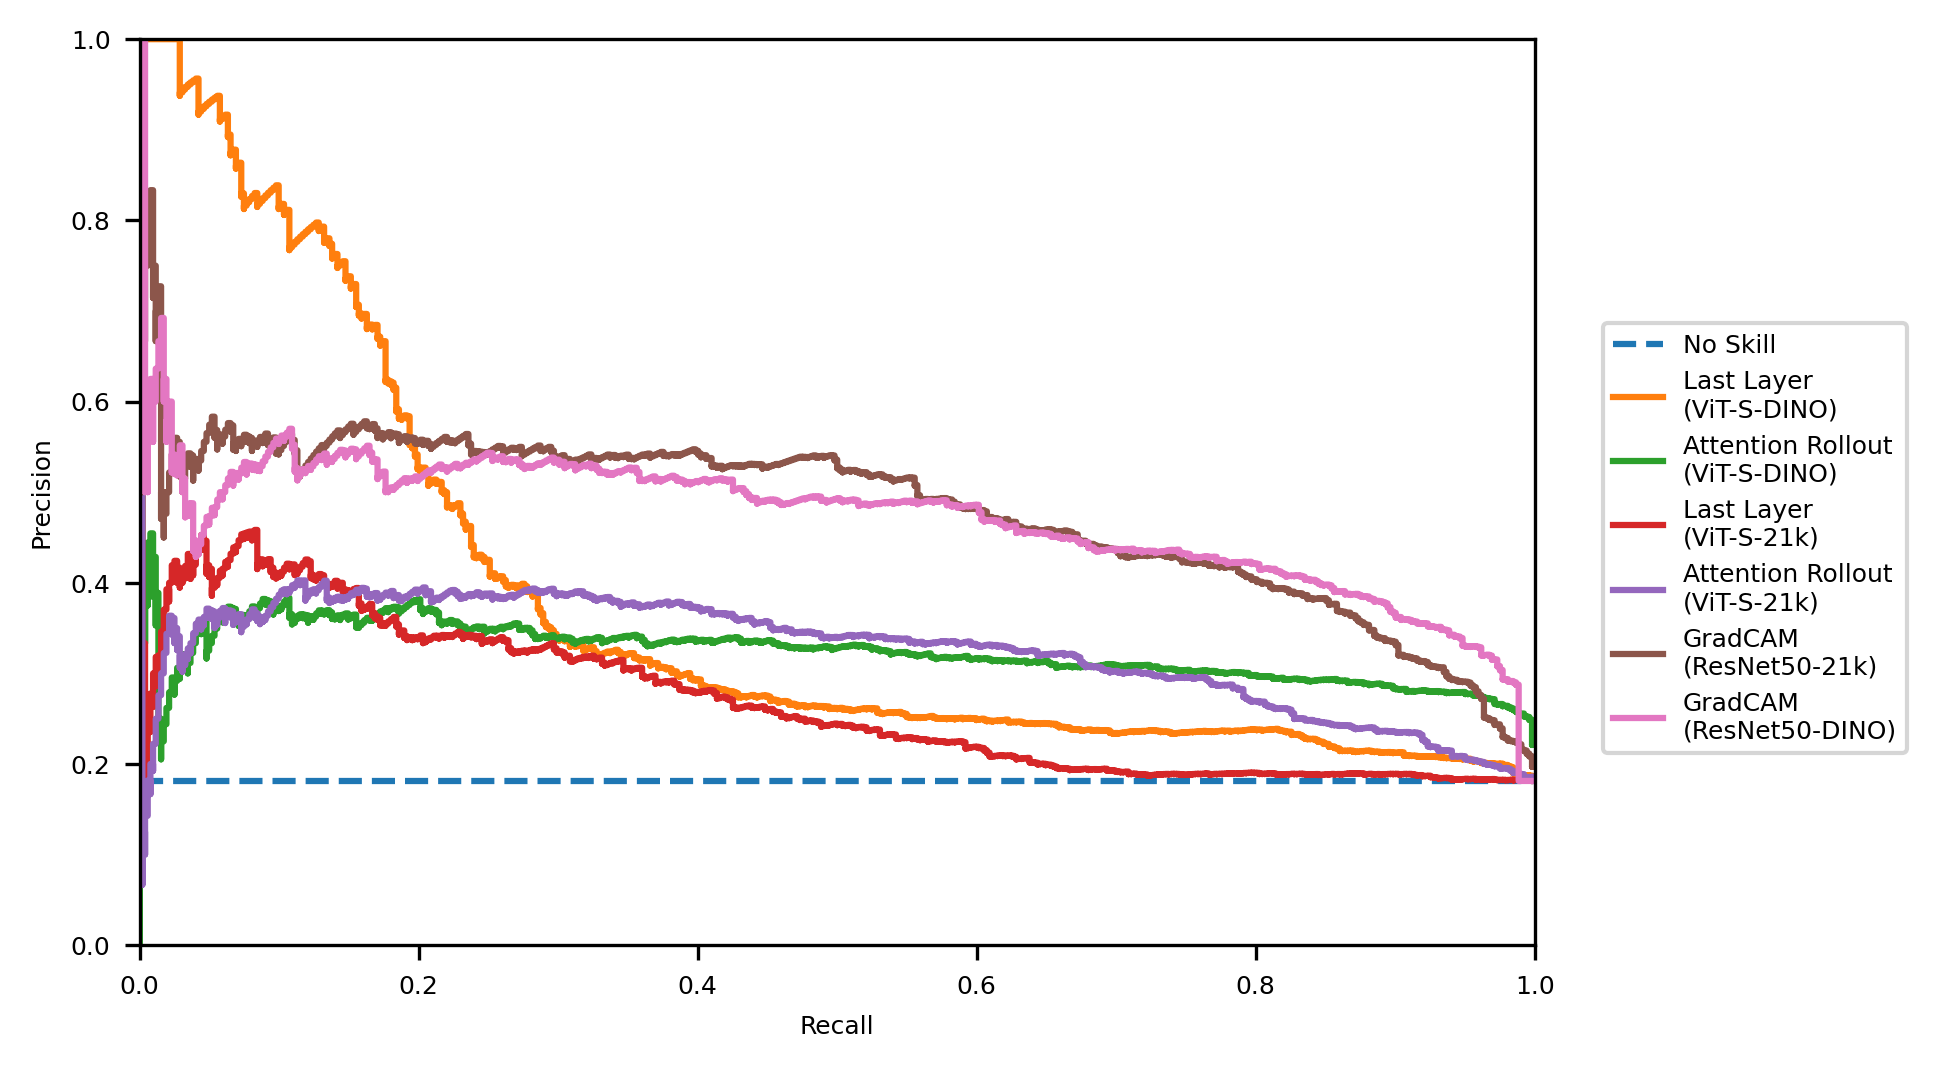

In [ ]:
fig, ax = plt.subplots()
for interpreter_label, (precision, recall) in pre_rec_dict.items():
    explainability.evaluate.plot_precision_recall_curve(precision, recall, y_true, ax, interpreter_label)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(1.04,0.7), loc="upper left")
plt.show()